<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


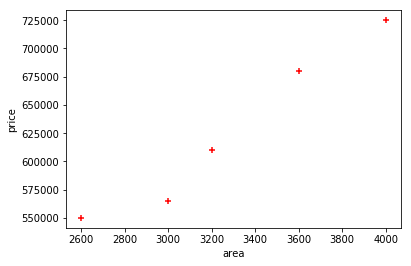

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
area = df[['area']]
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
reg.predict([[3000]])

array([587979.45205479])

In [8]:
reg.coef_

array([ 135.78767123])

In [9]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [10]:
5000*135.78767123 + 180616.43835616432

859554.7945061643

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [11]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [12]:
p = reg.predict(area_df)
p

array([  316404.10958904,   384297.94520548,   492928.08219178,
         661304.79452055,   740061.64383562,   799808.21917808,
         926090.75342466,   650441.78082192,   825607.87671233,
         492928.08219178,  1402705.47945205,  1348390.4109589 ,
        1144708.90410959])

In [13]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [14]:
area_df.to_csv("prediction.csv")

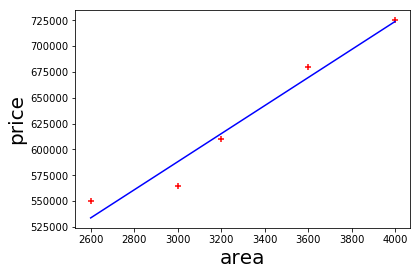

In [15]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(area),color='blue')